<div align='center'><div align='center'>
    
# **Image Processing**

</div>

## **Introduction to Loading Dataset**

In this section, we will focus on the **Loading Datasets**, specifically using the widely recognized MNIST dataset. The process of loading the dataset involves several key steps, including:

1. **Import Libraries**: Utilizing PyTorch's `torchvision` library to efficiently load and handle the data.
2. **Data Preprocessing**: Applying transformations such as converting images to tensors and normalizing pixel values.
3. **Splitting the Data**: Separating the dataset into **training** and **testing** sets to ensure proper evaluation.

By the end of this section, you will understand how to prepare the MNIST dataset for training and testing in a machine learning model.

**What is the MNIST Dataset?**
The MNIST dataset (Modified National Institute of Standards and Technology database) is a widely used benchmark dataset for image processing and machine learning. It consists of 70,000 grayscale images of handwritten digits (0-9), with:
- **60,000 images for training**
- **10,000 images for testing**

Each image is **28x28 pixels** in size, and the goal is to classify the digit in the image. This dataset is often used for evaluating classification algorithms in computer vision and deep learning.

### **Import Libraries**:

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### **Data Preprocessing**:
**ToTensor():** Converts images into PyTorch tensors and normalizes pixel values to the range [0, 1].

**Normalize((0.5,), (0.5,)):** Further normalizes the data to have a mean of 0 and a standard deviation of 1, scaling pixel values to [-1, 1]

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

### **Load Training Dataset**:
The training set is used to teach the model by adjusting weights based on prediction errors.

In [6]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 43.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.13MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.8MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.67MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### **Load Testing Dataset**:
The testing set is used to evaluate how well the model generalizes to unseen data, providing an unbiased performance metric.

In [7]:
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=False)

### **Visualize a few samples from the dataset**:
`matplotlib.pyplot` is a core module in the `matplotlib` library, a popular Python library used for creating static, interactive, and animated visualizations. It provides a MATLAB-like interface for plotting, making it simple to generate a wide range of visualizations, from basic plots to complex graphics.

The module is typically imported using the alias `plt`:
```python
import matplotlib.pyplot as plt

<div style="background:#EEEEFF;color:black">
    
**Exercise 1.1.5**
Please attempt to visualize a few samples from the MNIST dataset. Follow these steps:

1.Use the train_dataset defined earlier.

2.Access a few data samples (e.g., the first 5 images and their corresponding labels).

3.Plot these images using matplotlib.pyplot.imshow with a grayscale colormap.

4.Display their labels alongside the images.

</div>

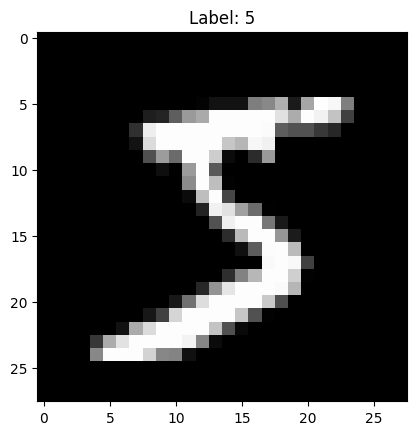

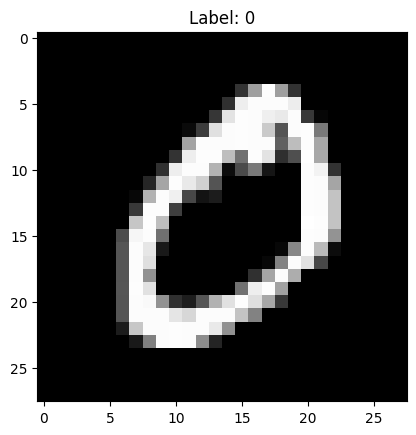

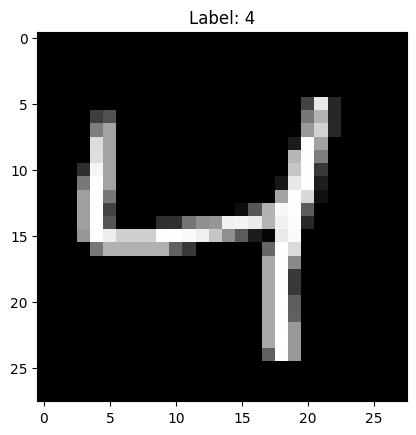

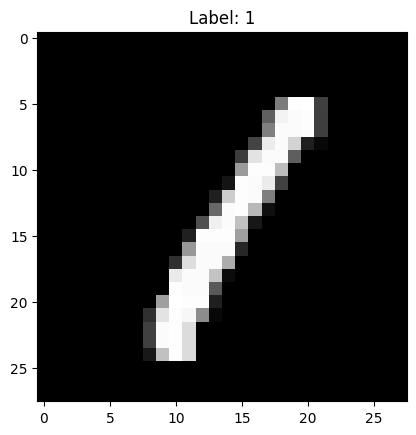

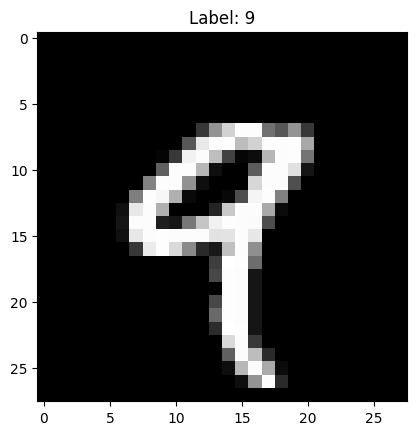

In [9]:
import matplotlib.pyplot as plt
for i in range(5):
    image, label = train_dataset[i]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()

## **Introduction of Different Machine Learning Models**

This code demonstrates the implementation of four types of neural network architectures for image classification tasks. These models vary in complexity and are suitable for different purposes.

### Perceptron Model
The **Perceptron** is the simplest neural network architecture, consisting of a single fully connected layer. It is used for basic linear classification tasks.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(28 * 28, 10)  # Input size: 28x28, Output size: 10 classes

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.fc(x)

model = Perceptron()
print(model)

Perceptron(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)


The Perceptron can handle basic linear classification tasks, where the data is linearly separable.

However, it still has challenges in non-linearity. The role of the activation function is crucial because. Without it, the model would essentially be performing linear regression, limiting its ability to solve complex problems. For instance, the absence of a non-linear activation function prevents the network from capturing non-linear relationships in the data. Activation functions, such as ReLU (Rectified Linear Unit), sigmoid, or tanh, enable the Perceptron to model more intricate decision boundaries, making it a fundamental building block for more advanced architectures.

### Introduction of Activation Functions in Neural Networks

Activation functions are a critical component of neural networks, introducing non-linearity that allows the network to model complex relationships. This section explores popular activation functions, their properties, and their visualizations.

---
**ReLU (Rectified Linear Unit)**
- Formula:
\begin{equation}
  f(x) = \max(0, x)
\end{equation}
- Characteristics:
  - Simple and computationally efficient.
  - Introduces sparsity, as negative values are mapped to 0.
  - Commonly used in deep learning architectures.

---
<div style="background:#EEEEFF;color:black">

**Exercise 1.2.1**: In this exercise, you will Visualize the ReLU. Follow these steps:
1. Import Required Libraries
   - Import necessary libraries like `numpy` and `matplotlib` to perform calculations and create plots.

   ```python
   import numpy as np
   import matplotlib.pyplot as plt
   ```

2. Define the ReLU Function: Write a simple Python function to compute the output of the ReLU activation
    
    ```python
   def relu(x):
       return np.maximum(0, x)
    ```
    
3. Visualize the ReLU Function: Plot the input vs. output relationship using ```matplotlib```

</div>

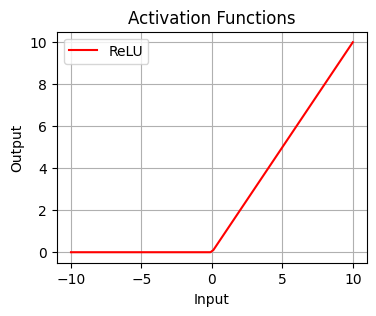

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Input range for visualization
x = torch.linspace(-10, 10, 100)

# Compute values for different activation functions
relu_y = relu(x)

# Visualization
plt.figure(figsize=(4, 3))

# RELU
plt.plot(x.numpy(), relu_y.numpy(), label='ReLU', color='red')

# Graph styling
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

**Sigmoid**
- Formula:
\begin{equation}
  f(x) = \frac{1}{1 + e^{-x}}
\end{equation}
- Characteristics:
  - Maps input values to the range (0, 1).
  - Suitable for probabilities.
  - Suffering from vanishing gradient issues for large positive/negative inputs.

---

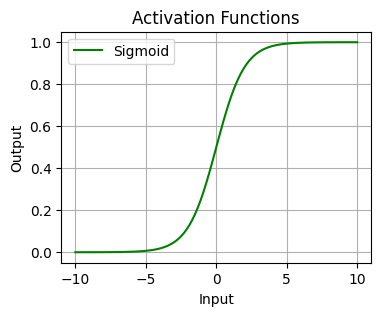

In [12]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Input range for visualization
x = torch.linspace(-10, 10, 100)

# Compute values for different activation functions
sigmoid_y = torch.sigmoid(x)

# Visualization
plt.figure(figsize=(4, 3))
# Sigmoid
plt.plot(x.numpy(), sigmoid_y.numpy(), label='Sigmoid', color='green')

# Graph styling
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

**Tanh (Hyperbolic Tangent)**

- Formula:
\begin{equation}
  f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{equation}
- Characteristics:
  - Maps input values to the range (-1, 1).
  - Zero-centered, which helps optimization.
  - Like Sigmoid, suffers from vanishing gradients for large inputs.

---

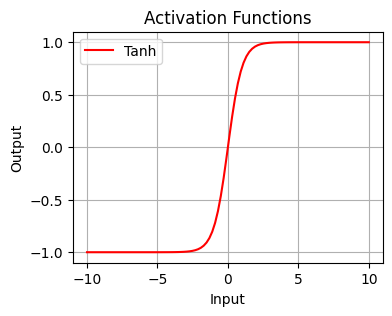

In [13]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Input range for visualization
x = torch.linspace(-10, 10, 100)

# Compute values for different activation functions
tanh_y = torch.tanh(x)

# Visualization
plt.figure(figsize=(4, 3))

# Tanh
plt.plot(x.numpy(), tanh_y.numpy(), label='Tanh', color='red')

# Graph styling
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

**Leaky ReLU**

- Formula:
\begin{equation}
  f(x) = \begin{cases}
  x & x > 0 \\
  \alpha x & x \leq 0
  \end{cases}
\end{equation}
- Characteristics:
  - Similar to ReLU, but allows a small gradient for negative values (`α > 0`), reducing the risk of dead neurons.
  - Often used as a default alternative to ReLU.

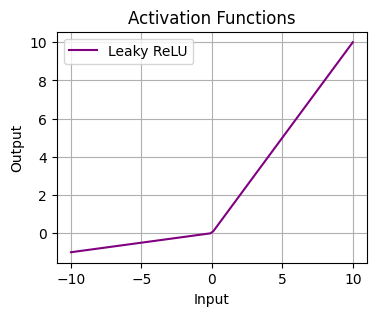

In [14]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Input range for visualization
x = torch.linspace(-10, 10, 100)

# Compute values for different activation functions
leaky_relu_y = F.leaky_relu(x, negative_slope=0.1)

# Visualization
plt.figure(figsize=(4, 3))

# Leaky ReLU
plt.plot(x.numpy(), leaky_relu_y.numpy(), label='Leaky ReLU', color='purple')

# Graph styling
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

### **Multilayer Perceptron (MLP) Model**
The MLP is an extension of the Perceptron, adding hidden layers for increased capacity to model non-linear relationships.

In [17]:
# Define the Multilayer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Hidden layer 1
        self.fc2 = nn.Linear(128, 64)       # Hidden layer 2
        self.fc3 = nn.Linear(64, 10)        # Output layer

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

### **Fully Connected Neural Network**
This model uses a modular approach with nn.Sequential, streamlining the implementation of fully connected layers and activation functions.

In [18]:
# Define a Basic Fully Connected Neural Network
class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.fc(x)

### **Simple CNN Model**
The Simple Convolutional Neural Network (CNN) leverages convolutional layers for feature extraction, making it more effective for image classification tasks.

In [19]:
# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 256 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## **Introduction of Loss Functions in Machine Learning**
Loss functions are used to measure the error between the predicted outputs of a model and the actual target values. They play a critical role in training neural networks, guiding the optimization process to improve performance. This section introduces three common loss functions and provides visualizations for better understanding.

---

### **Mean Squared Error (MSE)**
- Formula:
\begin{equation}
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred}} - y_{\text{true}})^2
\end{equation}
- Characteristics:
  - Penalizes larger errors more heavily due to squaring.
  - Suitable for regression tasks.
  - Sensitive to outliers.

---

### **Mean Absolute Error (MAE)**
- Formula:
\begin{equation}
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{pred}} - y_{\text{true}}|
\end{equation}
- Characteristics:
  - Treats all errors equally by using absolute values.
  - Robust to outliers compared to MSE.
  - Converges more slowly in optimization compared to MSE.

---

### **Binary Cross-Entropy (BCE)**
- Formula:
\begin{equation}
  \text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_{\text{true}} \log(y_{\text{pred}}) + (1 - y_{\text{true}}) \log(1 - y_{\text{pred}}) \right]
\end{equation}
- Characteristics:
  - Used for binary classification tasks.
  - Measures the difference between predicted probabilities and true binary labels.
  - Sensitive to predicted values approaching 0 or 1 due to logarithmic terms.

---
<div style="background:#EEEEFF;color:black">

**Exercise 1.3.1**: Loss functions are essential for evaluating model performance. In this exercise, we will visualize three common loss functions: **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **Binary Cross-Entropy (BCE)**. By visualizing these functions, you'll gain a deeper understanding of their characteristics and how they behave for different input values. Follow these steps:

1. Import Required Libraries
    
2. Define the Loss Functions
    
3. Generate Sample Data: Create a range of predicted values (y_pred) and true values (y_true). For simplicity, we'll use random values for y_true and vary y_pred between 0 and 1

4. Calculate the Loss Functions: Now, we'll calculate the loss for each of the three functions (MSE, MAE, and BCE) by iterating over a range of predicted values and computing the corresponding loss.
    
5. Plot the Loss Functions
</div>

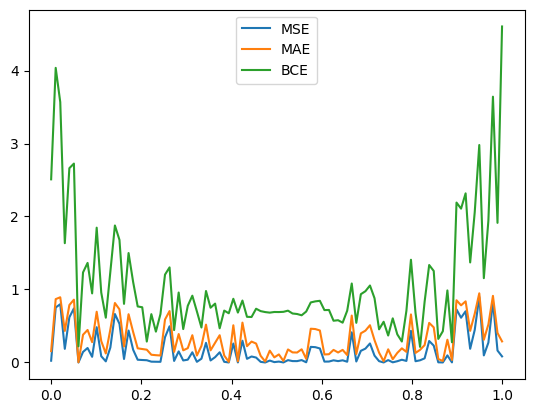

In [27]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

def mae_loss(y_pred, y_true):
    return torch.mean(torch.abs(y_pred - y_true))

def bce_loss(y_pred, y_true):
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

x = torch.linspace(0, 1, 100)
mse_losses = []
mae_losses = []
bce_losses = []


y_true = torch.rand(100)
y_pred = x

for i in range(100):
    mse_losses.append(mse_loss(y_pred[i], y_true[i]).item())
    mae_losses.append(mae_loss(y_pred[i], y_true[i]).item())
    bce_losses.append(bce_loss(torch.clamp(y_pred[i], 1e-7, 1-1e-7), y_true[i]).item())


plt.figure
plt.plot(x, mse_losses, label='MSE')
plt.plot(x, mae_losses, label='MAE')
plt.plot(x, bce_losses, label='BCE')
plt.legend()
plt.show()


### **Categorical Cross-Entropy (CCE)**
- Formula:
\begin{equation}
  \text{CCE} = - \sum_{c=1}^{C} y_{\text{true}, c} \log(y_{\text{pred}, c})
\end{equation}
- Characteristics:
  - Used for multi-class classification tasks.
  - Penalizes incorrect class predictions more heavily.
  - Works with one-hot encoded true labels and probability distributions from softmax.

**Example:**
- Predicted probabilities for three classes: \([0.8, 0.1, 0.1]\).
- True label: Class 0, represented as \([1, 0, 0]\).

For this prediction:
\begin{equation}
\text{CCE} = - (1 \cdot \log(0.8) + 0 \cdot \log(0.1) + 0 \cdot \log(0.1)) = - \log(0.8)
\end{equation}

---

<div style="background:#EEEEFF;color:black">

**Exercise 1.3.2**: In this exercise, we will visualize the Categorical Cross-Entropy (CCE) function and observe how it behaves for different predicted probabilities. Follow these steps:
    
1. Understand the Categorical Cross-Entropy Formula: Review the formula for CCE, where you compare the true class label (one-hot encoded) with the predicted class probabilities. This gives you an understanding of how the function works for multi-class classification problems.

2. Generate Predicted Probabilities: Generate a range of predicted probabilities for a multi-class classification problem. Use three possible classes and vary the predicted probabilities between 0 and 1.

3. Calculate CCE Loss: For each predicted probability distribution, calculate the CCE loss using the true label (e.g., class 0, 1, or 2). Visualize how the loss changes as the predicted probability for the true class increases or decreases.

4. Plot the Loss Function: Create a plot where the x-axis represents the predicted probability for the true class, and the y-axis represents the corresponding CCE loss. This will allow you to observe how the CCE increases as the predicted probabilities for the true class deviate from the actual label.

5. Analyze the Graph: After completing the visualization, analyze the graph to understand how the loss behaves. Focus on how the CCE increases as the predicted probability for the true class decreases, especially when the predicted probability is close to zero.
    
P.S. The given predictions are: [[0.8, 0.1, 0.1],[0.2, 0.5, 0.3],[0.1, 0.2, 0.7]] and corresponding labels are  [[1, 0, 0],[0, 1, 0],[0, 0, 1]]
    
</div>

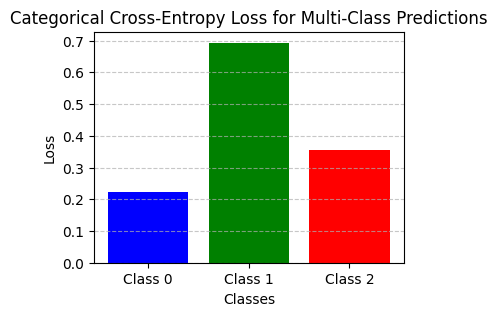

**Conclusion**
- **MSE** is suitable for regression tasks but sensitive to outliers.
- **MAE** is robust to outliers but converges more slowly.
- **BCE** is ideal for binary classification tasks, as it measures the error in predicted probabilities.
- **Categorical Cross-Entropy** extends the idea to handle multi-class classification.


Choosing the right loss function depends on the type of problem, the data's characteristics, and the desired behavior during optimization.

## **Introduction of Optimizers in Machine Learning**

Optimizers are an essential component in training neural networks. They are used to adjust the weights of the model during the training process to minimize the loss function. PyTorch provides several built-in optimizers in the `torch.optim` module, including **Adam** and **SGD**.

---

### **SGD Optimizer in PyTorch**

Stochastic Gradient Descent (SGD) is one of the foundational optimization algorithms in deep learning. It updates model parameters by taking steps in the negative direction of the gradient of the loss function. PyTorch provides an efficient implementation of SGD in the `torch.optim` module.

---

Below is an example of how to define and use the **SGD optimizer** in PyTorch:

```python
import torch.optim as optim
learning_rate = 0.01
momentum = 0.9
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
```
---
### **Adam Optimizer**
Adam (Adaptive Moment Estimation) is a popular optimization algorithm that combines the advantages of **momentum** and **RMSProp**. It adapts the learning rate for each parameter based on the first and second moments of the gradients.

```python
# Define the Adam optimizer
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
```

## **General Case: Design a Neural Network for MNIST**

<div style="background:#EEEEFF;color:black">

**Exercise 1.5.1**: In this exercise, you will design and train a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. Follow these steps:
1.Import Libraries
    
2.Load the MNIST Dataset
    
3.Define the Neural Network
    
4.Define Loss and Optimizer
    
5.Train the Model
    
6.Evaluate the Model
    
7.Visualize the Training Loss

</div>

Epoch [1/5], Loss: 0.1370
Epoch [2/5], Loss: 0.0375
Epoch [3/5], Loss: 0.0246
Epoch [4/5], Loss: 0.0168
Epoch [5/5], Loss: 0.0110
Accuracy of the model on the test images: 99.08%


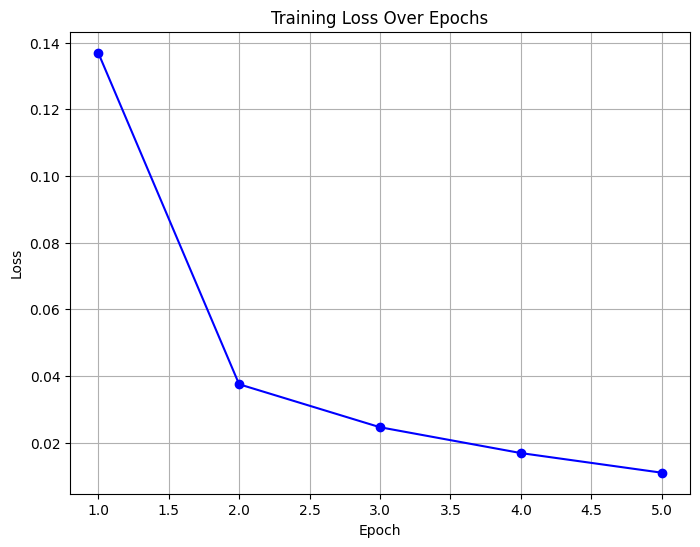

<div style="background:#EEEEFF;color:black">

**Exercise 1.5.2**:
    
**For More Challenge:**

1.Try modifying the architecture (e.g., add more layers or units).
    
2.Experiment with different learning rates or optimizers.
    
3.Visualize predictions made by the model on a few test images.

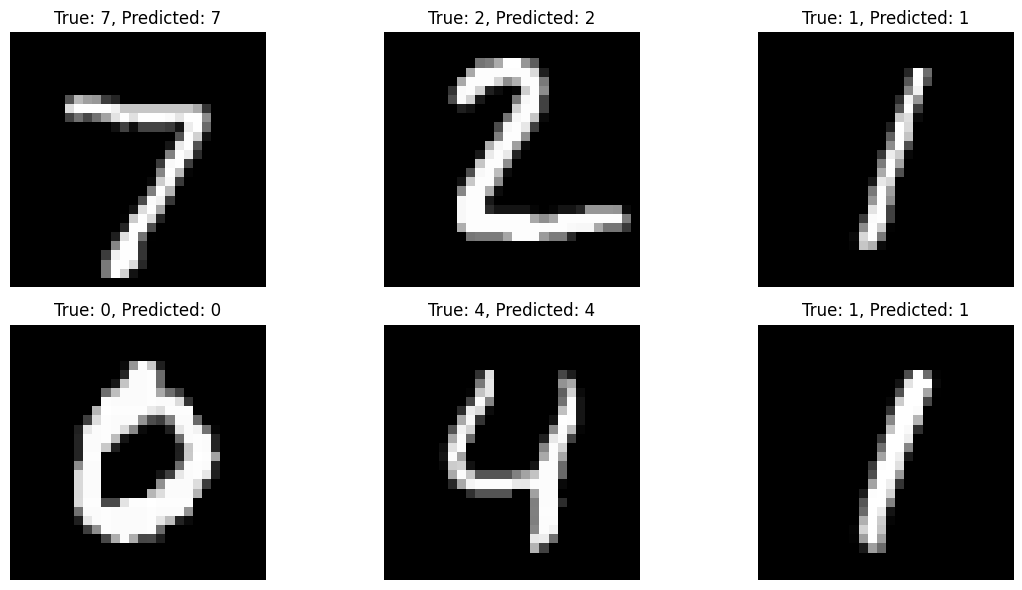